<a href="https://colab.research.google.com/github/areej90/SDAIA-Projects/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('/content/file.csv')

In [3]:
df.dropna(inplace=True)

In [4]:
df.shape

(373, 6)

In [5]:
df.duplicated().sum()

49

In [6]:
df.drop_duplicates(inplace=True)
df.shape

(324, 6)

In [7]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


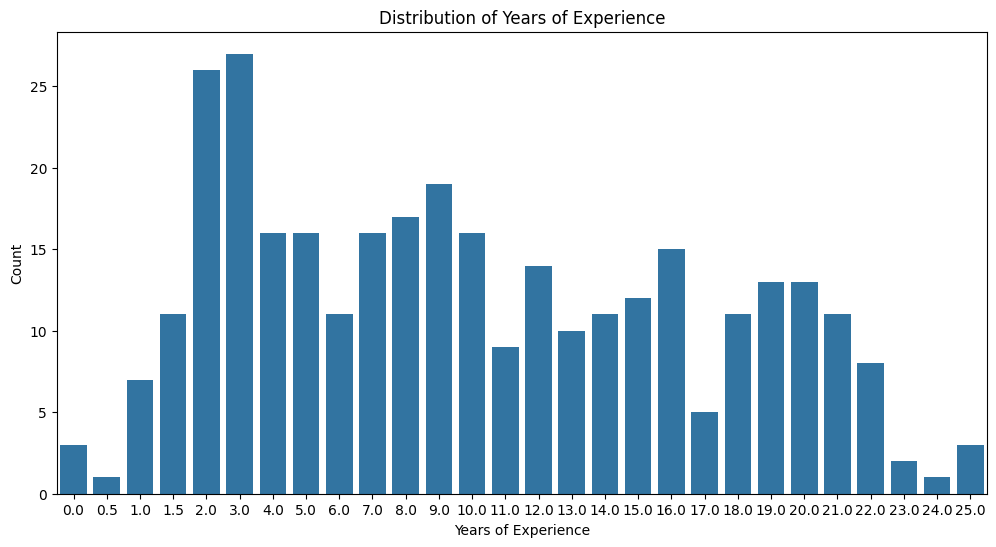

In [8]:
years = df['Years of Experience'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=years.index, y=years.values)
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.title('Distribution of Years of Experience')
plt.show()

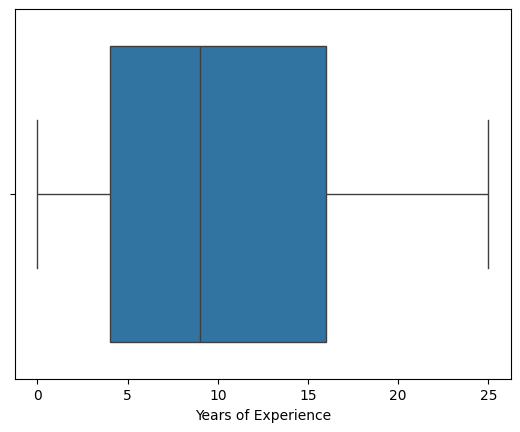

In [9]:
sns.boxplot(x=df['Years of Experience'])
plt.xlabel('Years of Experience')
plt.show()

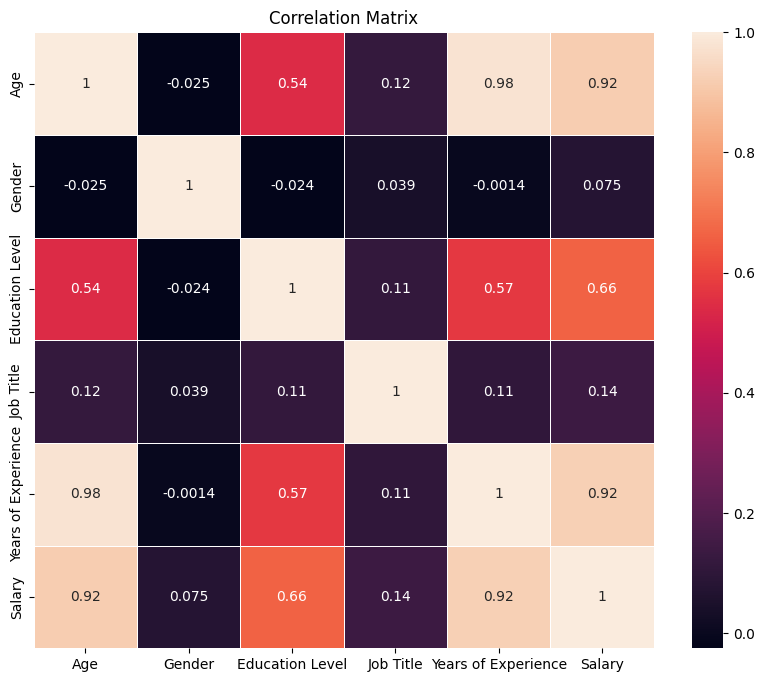

In [10]:
df_encoded = df.copy()

label_encoders = {}
for column in ['Gender', 'Education Level', 'Job Title']:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

correlation_matrix = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.color_palette("husl", 8)
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<Axes: >

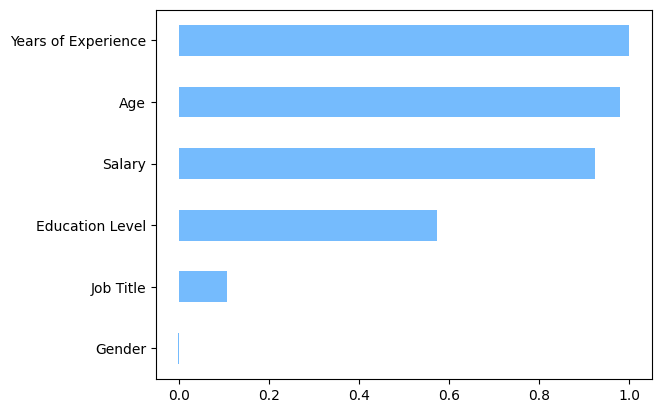

In [11]:
correlation_matrix['Years of Experience'].sort_values().plot.barh(color='xkcd:sky blue')

In [12]:
x = df.drop(columns=['Years of Experience'])
y = df['Years of Experience']

num_cols = x.select_dtypes(include=np.number).columns
cat_cols = x.select_dtypes(include='object').columns


numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, num_cols),
                                               ('cat', categorical_transformer, cat_cols)])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
    ])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model.fit(x_train, y_train)


y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 2.8262881722692663
R-squared: 0.9304990205670887
Root Mean Squared Error: 1.6811567958608935


In [13]:
new_data = pd.DataFrame([{
    'Age' : 27,
    'Gender' : 'Female',
    'Education Level' : "Bachelor's" ,
    'Job Title' : 'Data Analyst',
    'Salary' : 135000
}])

new_pred = model.predict(new_data)
print("Predicted Years of Experience:", new_pred[0])

Predicted Years of Experience: 2.728303494768377


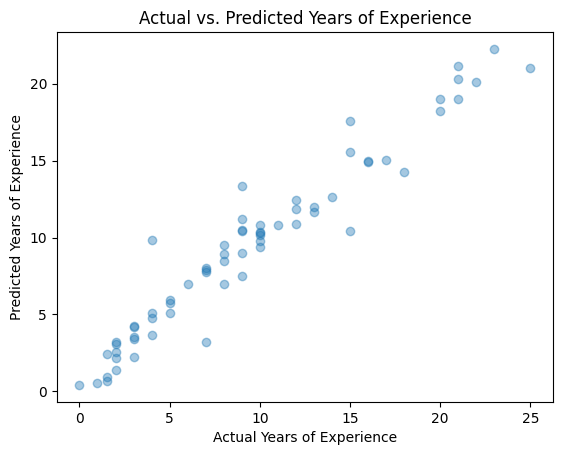

In [14]:
plt.scatter(y_test, y_pred , alpha=0.4)
plt.xlabel('Actual Years of Experience')
plt.ylabel('Predicted Years of Experience')
plt.title('Actual vs. Predicted Years of Experience')
plt.show()

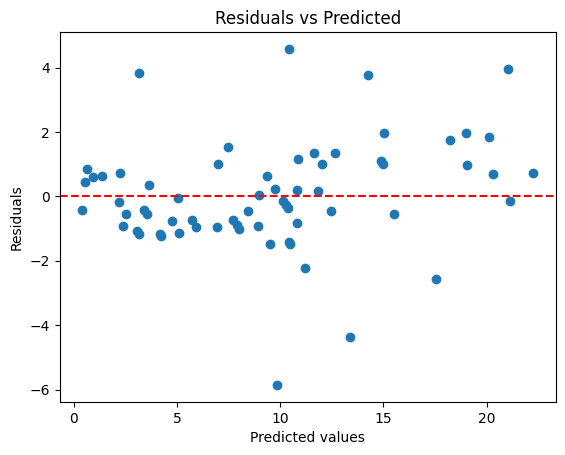

In [15]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


# Change target   'Salary'

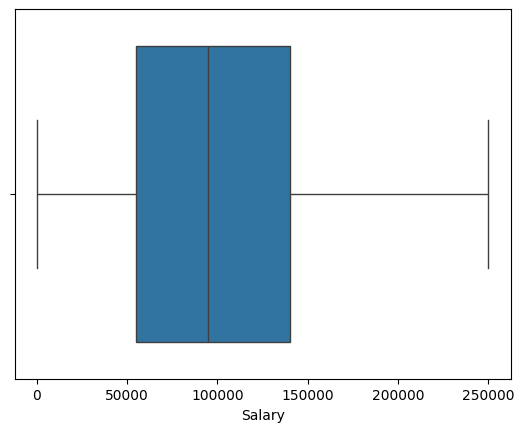

In [16]:
sns.boxplot(x=df['Salary'])
plt.xlabel('Salary')
plt.show()

<Axes: >

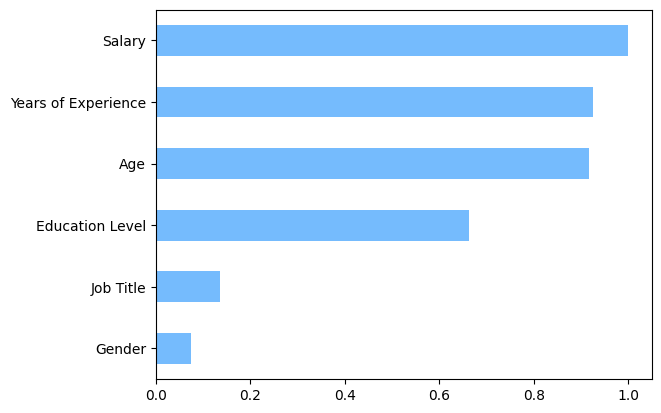

In [17]:
correlation_matrix['Salary'].sort_values().plot.barh(color='xkcd:sky blue')

In [19]:
x1 = df.drop(columns=['Salary'])
y1 = df['Salary']

num_cols1 = x1.select_dtypes(include=np.number).columns
cat_cols1 = x1.select_dtypes(include='object').columns

numerical_transformer1 = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer1 = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor1 = ColumnTransformer(transformers=[
    ('num', numerical_transformer1, num_cols1),
    ('cat', categorical_transformer1, cat_cols1)
])

model1 = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('regressor', LinearRegression())
])

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

model1.fit(x_train1, y_train1)

y_pred1 = model1.predict(x_test1)

mse1 = mean_squared_error(y_test1, y_pred1)
r21 = r2_score(y_test1, y_pred1)
rmse1 = np.sqrt(mean_squared_error(y_test1, y_pred1))

print("Mean Squared Error:", mse1)
print("R-squared:", r21)
print("Root Mean Squared Error:", rmse1)

Mean Squared Error: 251259205.56392583
R-squared: 0.8670436361748186
Root Mean Squared Error: 15851.157861933172


In [20]:
new_data1 = pd.DataFrame([{
    'Age' : 25 ,
    'Gender' : 'Female',
    'Education Level' : "Bachelor's" ,
    'Job Title' : 'Data Analyst',
    'Years of Experience' : 4
}])
new_pred1 = model1.predict(new_data1)
print("Predicted Salary:", new_pred1[0])

Predicted Salary: 38903.24864406295


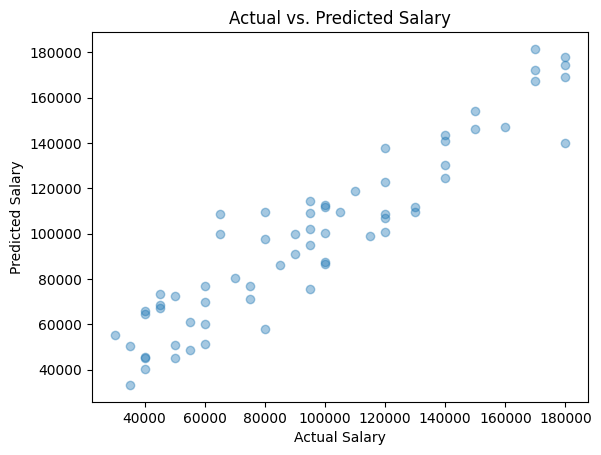

In [21]:
plt.scatter(y_test1, y_pred1 , alpha=0.4)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary')
plt.show()

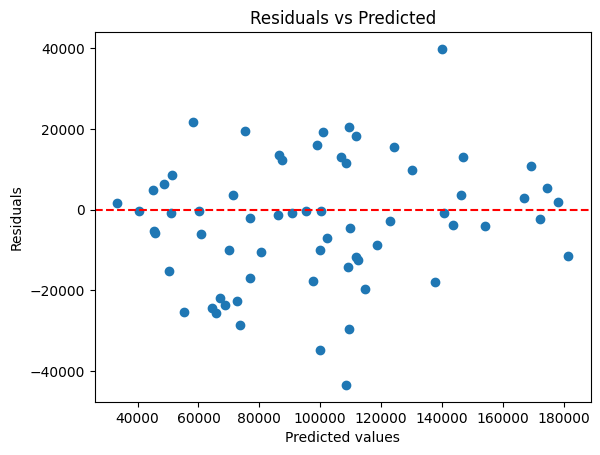

In [22]:
residuals1 = y_test1 - y_pred1
plt.scatter(y_pred1, residuals1)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()